In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()

1. Import the data

In [87]:
data = pd.read_csv("socialmobility.csv")
data

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


2. Choose a Dirichlet prior to have a uniform distribution over the probability vector
parameter of the multinomial.

prior alpha is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


(array([35., 26., 16.,  9., 10.,  2.,  1.,  0.,  0.,  1.]),
 array([2.63999989e-04, 3.48938821e-02, 6.95237642e-02, 1.04153646e-01,
        1.38783528e-01, 1.73413410e-01, 2.08043292e-01, 2.42673175e-01,
        2.77303057e-01, 3.11932939e-01, 3.46562821e-01]),
 <a list of 10 Patch objects>)

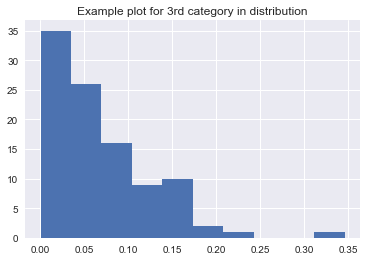

In [126]:
prior_alpha = np.array([1]*len(categories))
print("prior alpha is: ",prior_alpha)

#generate dirichlet distribution with prior alpha as parameter
prior_dist = stats.dirichlet(prior_alpha)
#sample from distribution
sample = prior_dist.rvs(100)
#example plot for 3rd category in distribution
plt.title("Example plot for 3rd category in distribution")
plt.hist(sample[:,3])

3. Refer to the conjugate prior table on Wikipedia for how to compute posterior
hyperparameters of the Dirichlet posterior distribution.


4. Write Python code to compute the posterior Dirichlet distribution, given your prior
hyperparameters and the data. Do not use Stan, but rather implement the update
equations from prior to posterior manually.

posterior alpha:  [ 704 1479 1431 1110   59 1757 1631 1569   64 1454 2069 2484   62  750
 1184 3316]


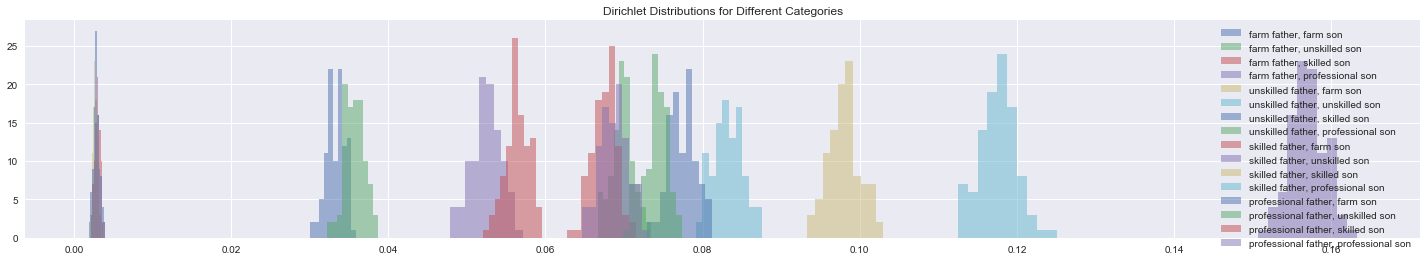

In [124]:
data = pd.read_csv("socialmobility.csv")

#categorical data from socialmobility.csv
fathers = np.array(data['father'])
sons = np.array(data['son'])
data = np.array(data['count'])
posterior_alpha = prior_alpha + data
print("posterior alpha: ",posterior_alpha)

post_dist = stats.dirichlet(posterior_alpha)
sample = post_dist.rvs(100)

plt.figure(figsize=(25, 4))
plt.title("Dirichlet Distributions for Different Categories")
for i in range(len(data)):
    plt.hist(sample[:,i],alpha=0.5,label="{} father, {} son".format(fathers[i],sons[i]))
plt.legend(loc='best')

5. Use your code to answer the following questions. Note that the two questions ask for
different conditional probabilities. The first asks for the son’s profession conditioned on
the father’s, while the second is the other way round.


a. What is the posterior 95% probability interval over the probability that a son will
become a skilled laborer if his father was an unskilled laborer?


b. What is the posterior 95% probability interval over the probability that a father
works on a farm if his son works as a professional?

95% CI for son skilled, given father unskilled:  [0.07326803 0.08070276]
95% CI for father farm, given son professional:  [0.04973569 0.05504392]


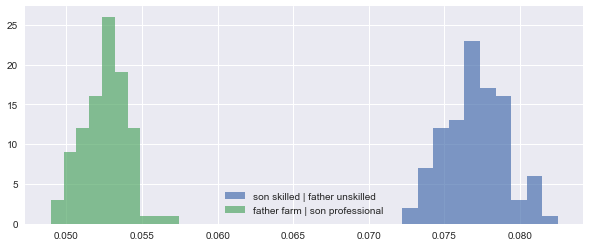

In [108]:
#son skilled, given father unskilled - row 6
print("95% CI for son skilled, given father unskilled: ",np.percentile(sample[:,6], [2.5, 97.5]))

#father farm, given son professional - row 3
print("95% CI for father farm, given son professional: ",np.percentile(sample[:,3], [2.5, 97.5]))

plt.figure(figsize=(10, 4))
plt.hist(sample[:,6], alpha=0.7, label='son skilled | father unskilled')
plt.hist(sample[:,3], alpha=0.7, label='father farm | son professional')
plt.legend(loc='best')